# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

import statsmodels.api as sms
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data/df_clean.csv")
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [3]:
# drop "id" column
df.drop("Unnamed: 0", inplace=True, axis=1)

In [4]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
count,21597.000000,2.159700e+04,21595.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,143902.699542,5.402966e+05,3.371475,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1788.596842,285.716581,1970.999676,143902.699542,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,264.143331
std,4436.651495,3.673681e+05,0.902643,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,827.759761,439.819830,29.375234,4436.651495,53.513072,0.138552,0.140724,685.230472,27274.441950,110.000058
min,140502.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,140502.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.590000
25%,140722.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,140722.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,182.290000
50%,141016.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,141016.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,244.640000
75%,150217.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,150217.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,318.330000
max,150527.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,150527.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.140000


## Correlation analysis and heatmap

In [5]:
continuous_var = [
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 "sqft_l_price"]

In [6]:
categorical_var=["waterfront",                   
                 "condition", 
                 "grade", 
                 "zipcode"]

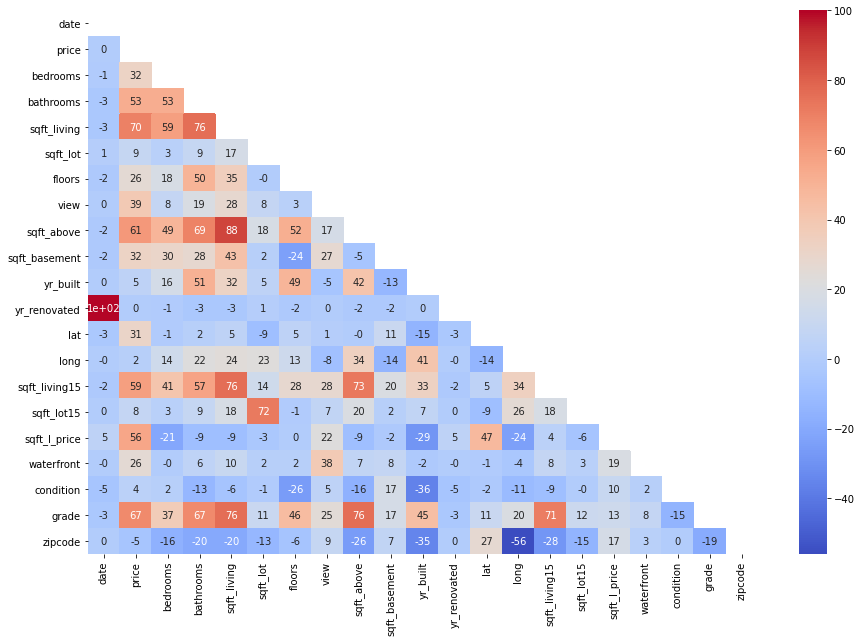

In [7]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

## Plots

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

In [9]:
df['grade'].nunique()

11

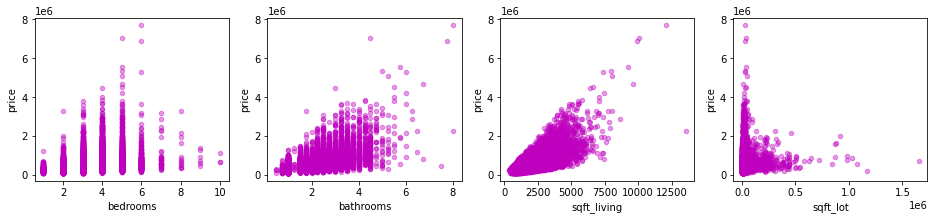

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/scatter-bed-bath-sqft.png')

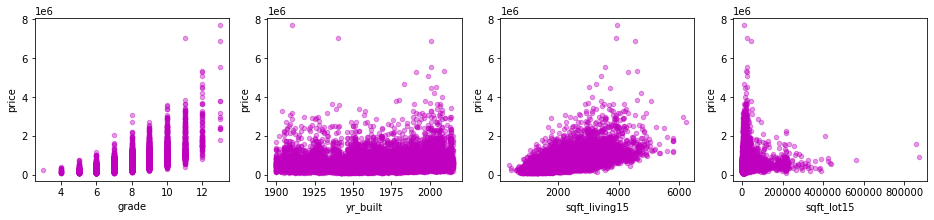

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'yr_built', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/scatter-grade-built-sqft15.png')

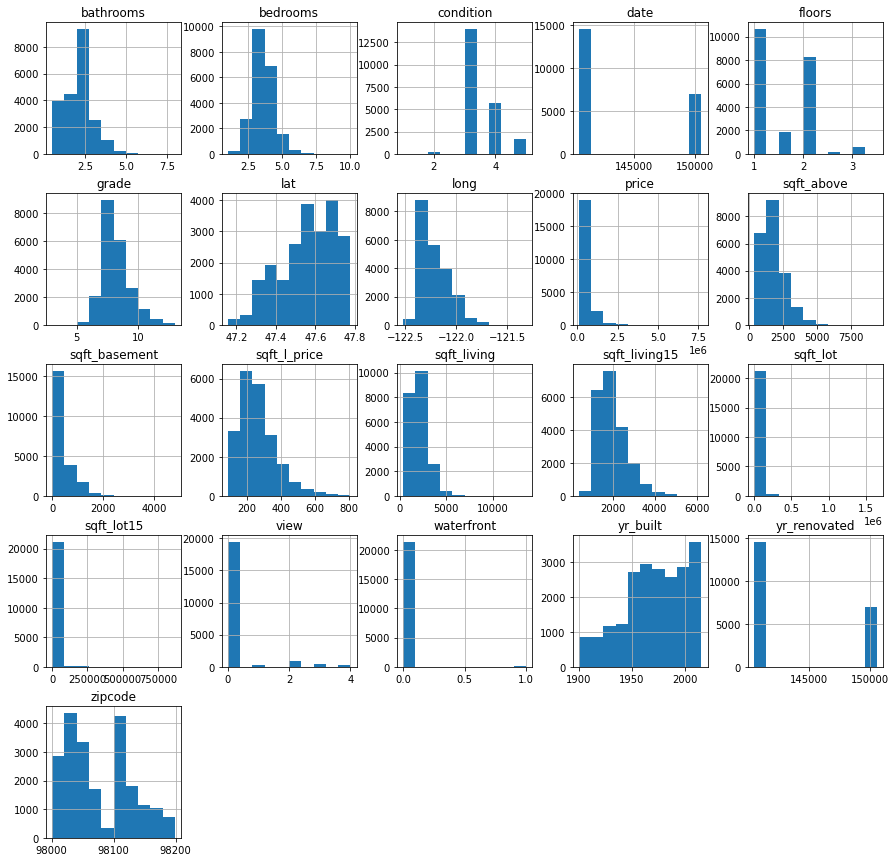

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

## Create dummies

In [13]:
df[['bedrooms', 'bathrooms', 'floors', 'grade']].nunique()

bedrooms     10
bathrooms    29
floors        6
grade        11
dtype: int64

In [14]:
df["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [15]:
df["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [16]:
grades = [ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13]
grades_series = pd.Series(grades)
grades_series

0      7
1      6
2      8
3     11
4      9
5      5
6     10
7     12
8      4
9      3
10    13
dtype: int64

In [17]:
zipcodes = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039]
zipcodes_series = pd.Series(zipcodes)

In [18]:
cat_grades = grades_series.astype('category')
cat_grades

0      7
1      6
2      8
3     11
4      9
5      5
6     10
7     12
8      4
9      3
10    13
dtype: category
Categories (11, int64): [3, 4, 5, 6, ..., 10, 11, 12, 13]

In [19]:
cat_zipcodes = zipcodes_series.astype('category')

In [20]:
pd.get_dummies(cat_grades)

,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0


In [21]:
pd.get_dummies(cat_zipcodes)

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
grades_dummies = lb.fit_transform(cat_grades)
grades_dum_df = pd.DataFrame(grades_dummies,columns=lb.classes_)
grades_dum_df

,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0


In [23]:
lb = LabelBinarizer()
zipcodes_dummies = lb.fit_transform(cat_zipcodes)
zipcodes_dum_df = pd.DataFrame(zipcodes_dummies,columns=lb.classes_)

In [24]:
#df = df.drop(['grade','zipcode'], axis=1)

In [25]:
#df = pd.concat([df, grades_dum_df], axis=1)
#data.head()

## Regression model

In [26]:
df_less_250k = df[df["price"] < 250001]

# cool querys
df_less_500k = df.query('price <= 500000')
df_less_1mio = df.query('price <= 1000000')

# better price per sqft than mean = 264.14
df_better_pricesqft = df.query('sqft_l_price < 264.14')

In [27]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

### Over all 65%

In [28]:
# over all
model = 'price ~ sqft_living + bathrooms + bedrooms + waterfront + yr_built + condition + grade + sqft_living15 + sqft_lot15'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     4409.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:39:57   Log-Likelihood:            -2.9610e+05
No. Observations:               21595   AIC:                         5.922e+05
Df Residuals:                   21585   BIC:                         5.923e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.59e+06   1.27e+05     51.722      0.000    6.34e+06    6.84e+06
sqft_living     168.3836      3.629     46.400      0.000     161.271     175.497
bathrooms      5.835e+04   3366.491     17.333      0.000    5.18e+04     6.5e+04
bedrooms      -4.768e+04   2133.938    -22.345      0.000   -5.19e+04   -4.35e+04
waterfront      7.53e+05   1.83e+04     41.113      0.000    7.17e+05    7.89e+05
yr_built      -3774.7484     65.280    -57.824      0.000   -3902.702   -3646.795
condition      1.757e+04   2460.444      7.141      0.000    1.27e+04    2.24e+04
grade          1.257e+05   2224.164     56.530      0.000    1.21e+05     1.3e+05
sqft_living15    28.7164      3.529      8.136      0.000      21.799      35.634
sqft_lot15       -0.5908      0.056    -10.544      0.000      -0.701      -0.481
==============================================================================
Omnibus:                    15940.338   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1052214.732
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      36.683   Cond. No.                     2.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### less 250k R 20%

In [29]:
# less 250k
model = 'price ~ sqft_living + bathrooms + bedrooms + waterfront + yr_built + condition + grade + sqft_living15 + sqft_lot15'
smf.ols(formula=model, data=df_less_250k).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     74.79
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          1.90e-110
Time:                        07:39:57   Log-Likelihood:                -28599.
No. Observations:                2427   AIC:                         5.722e+04
Df Residuals:                    2418   BIC:                         5.727e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.532e+04   7.01e+04      0.361      0.718   -1.12e+05    1.63e+05
sqft_living      19.4463      2.766      7.030      0.000      14.022      24.871
bathrooms      6712.6065   1787.905      3.754      0.000    3206.622    1.02e+04
bedrooms       -612.4838   1080.808     -0.567      0.571   -2731.890    1506.923
waterfront    -4.827e-08   1.34e-07     -0.362      0.718    -3.1e-07    2.14e-07
yr_built         31.5811     37.430      0.844      0.399     -41.818     104.980
condition      7196.4497    941.101      7.647      0.000    5351.002    9041.897
grade          8566.4192   1184.379      7.233      0.000    6243.916    1.09e+04
sqft_living15     4.9132      2.273      2.161      0.031       0.455       9.371
sqft_lot15        0.0316      0.037      0.852      0.394      -0.041       0.104
==============================================================================
Omnibus:                      151.517   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.268
Skew:                          -0.654   Prob(JB):                     1.18e-39
Kurtosis:                       3.254   Cond. No.                     1.73e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### less 500k R 24%

In [30]:
# less 500k
model = 'price ~ sqft_living + bathrooms + bedrooms + waterfront + yr_built + condition + grade + sqft_living15 + sqft_lot15'
smf.ols(formula=model, data=df_less_500k).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     443.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:39:57   Log-Likelihood:            -1.5948e+05
No. Observations:               12546   AIC:                         3.190e+05
Df Residuals:                   12536   BIC:                         3.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.664e+06   7.07e+04     23.529      0.000    1.53e+06     1.8e+06
sqft_living      23.0544      2.291     10.062      0.000      18.563      27.546
bathrooms      2.844e+04   1787.162     15.911      0.000    2.49e+04    3.19e+04
bedrooms      -1.121e+04   1129.462     -9.921      0.000   -1.34e+04   -8991.543
waterfront     5.766e+04   2.32e+04      2.482      0.013    1.21e+04    1.03e+05
yr_built       -865.3869     37.237    -23.240      0.000    -938.376    -792.398
condition      2349.4994   1190.793      1.973      0.049      15.363    4683.635
grade          4.069e+04   1260.295     32.284      0.000    3.82e+04    4.32e+04
sqft_living15    16.3948      2.207      7.430      0.000      12.070      20.720
sqft_lot15        0.0683      0.034      2.008      0.045       0.002       0.135
==============================================================================
Omnibus:                      797.330   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.590
Skew:                           0.059   Prob(JB):                     4.81e-64
Kurtosis:                       2.263   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### less 1 Mio R 54%

In [31]:
# less 1mio
model = 'price ~ sqft_living + bathrooms + bedrooms + waterfront + yr_built + condition + grade + sqft_living15 + sqft_lot15'
smf.ols(formula=model, data=df_less_1mio).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2720.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:39:57   Log-Likelihood:            -2.6600e+05
No. Observations:               20137   AIC:                         5.320e+05
Df Residuals:                   20127   BIC:                         5.321e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.452e+06   8.25e+04     53.951      0.000    4.29e+06    4.61e+06
sqft_living      61.2185      2.552     23.991      0.000      56.217      66.220
bathrooms      4.236e+04   2172.432     19.500      0.000    3.81e+04    4.66e+04
bedrooms      -1.681e+04   1378.878    -12.192      0.000   -1.95e+04   -1.41e+04
waterfront     1.698e+05   1.87e+04      9.066      0.000    1.33e+05    2.07e+05
yr_built      -2525.3528     42.614    -59.260      0.000   -2608.881   -2441.825
condition      1.368e+04   1547.673      8.841      0.000    1.06e+04    1.67e+04
grade          9.344e+04   1457.136     64.126      0.000    9.06e+04    9.63e+04
sqft_living15    50.3715      2.424     20.781      0.000      45.620      55.123
sqft_lot15       -0.1550      0.036     -4.277      0.000      -0.226      -0.084
==============================================================================
Omnibus:                      398.745   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.661
Skew:                           0.310   Prob(JB):                     2.28e-98
Kurtosis:                       3.390   Cond. No.                     2.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Price sqft lower Mean R 76%

In [32]:
# better price
model = 'price ~ sqft_living + bathrooms + bedrooms + waterfront + yr_built + condition + grade + sqft_living15 + sqft_lot15'
smf.ols(formula=model, data=df_better_pricesqft).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4396.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:39:57   Log-Likelihood:            -1.6009e+05
No. Observations:               12429   AIC:                         3.202e+05
Df Residuals:                   12419   BIC:                         3.203e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.406e+06   9.11e+04     15.428      0.000    1.23e+06    1.58e+06
sqft_living     141.9033      2.200     64.503      0.000     137.591     146.215
bathrooms      1.336e+04   2016.045      6.628      0.000    9411.475    1.73e+04
bedrooms      -9536.2299   1256.931     -7.587      0.000    -1.2e+04   -7072.450
waterfront     -906.2210   3.37e+04     -0.027      0.979   -6.69e+04    6.51e+04
yr_built       -871.1596     47.118    -18.489      0.000    -963.519    -778.800
condition      6564.2311   1500.943      4.373      0.000    3622.150    9506.312
grade          4.504e+04   1404.643     32.064      0.000    4.23e+04    4.78e+04
sqft_living15    31.7251      2.245     14.131      0.000      27.324      36.126
sqft_lot15        0.1253      0.028      4.410      0.000       0.070       0.181
==============================================================================
Omnibus:                      245.396   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.889
Skew:                          -0.237   Prob(JB):                     3.49e-75
Kurtosis:                       3.661   Cond. No.                     3.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""